
# 📘 Reinforcement Learning (RL) Overview

Reinforcement Learning is a type of machine learning where an **agent learns to make decisions by interacting with an environment** to maximize cumulative reward.

---

## 🧠 Core Concepts

| Term              | Description |
|-------------------|-------------|
| **Agent**         | The learner or decision-maker. |
| **Environment**   | The external system the agent interacts with. |
| **State ($s$)**   | A representation of the current situation of the environment. |
| **Action ($a$)**  | A choice made by the agent that affects the state. |
| **Reward ($r$)**  | A feedback signal received after taking an action. |
| **Policy ($\pi$)**| A strategy the agent follows to choose actions. |
| **Value Function ($V(s)$)** | Expected cumulative reward starting from state $s$. |
| **Q-Value ($Q(s,a)$)** | Expected cumulative reward starting from state $s$ and action $a$. |

---

## 🎯 Goal of RL

Learn an optimal policy $\pi^*$ that maximizes the **expected return** (total reward):

$$
\pi^* = \arg\max_\pi \mathbb{E}[R_t | \pi]
$$

Where $R_t = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}$ and $\gamma \in [0, 1)$ is a discount factor.

---

## 🔁 RL Loop

1. Agent observes state $s_t$
2. Agent selects action $a_t$ using policy $\pi(a_t|s_t)$
3. Environment returns reward $r_t$ and next state $s_{t+1}$
4. Agent updates policy using reward signal

---

## 🔢 Part 1: Q-Learning – Step-by-Step

Q-learning is a **value-based off-policy** RL algorithm. It learns the **optimal action-value function** $Q^*(s, a)$ without needing a model of the environment.

### Q-learning Update Rule

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ r_t + \gamma \max_{a'} Q(s_{t+1}, a') - Q(s_t, a_t) \right]
$$

---

## 🔁 Q-Learning Example: Grid World

**Grid World** (2x2):

```
+----+----+
| S  |    |
+----+----+
|    | G  |
+----+----+
```

- Start at (0,0), goal at (1,1)
- Actions: UP, DOWN, LEFT, RIGHT
- Reward: +1 for reaching goal, 0 otherwise

### Iterations:

1. (0,0) → RIGHT → (0,1) → reward 0  
2. (0,1) → DOWN → (1,1) → reward +1  

Updated values:
- $Q(0,1,\text{DOWN}) = 0.5 \rightarrow 0.75 \rightarrow 0.9375$
- $Q(0,0,\text{RIGHT}) = 0 \rightarrow 0.25 \rightarrow 0.5 \rightarrow 0.6875$

Learned Policy:
- At (0,0) → RIGHT
- At (0,1) → DOWN

---

## 🎯 Part 2: Policy Gradient (REINFORCE)

This is a **policy-based on-policy** method. Instead of learning $Q(s, a)$, it directly learns the policy $\pi_\theta(a|s)$.

### Policy Gradient Theorem

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \left[ \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot R_t \right]
$$

Update rule:

$$
\theta \leftarrow \theta + \alpha \nabla_\theta \log \pi_\theta(a_t | s_t) \cdot R_t
$$

With baseline:

$$
\theta \leftarrow \theta + \alpha \nabla_\theta \log \pi_\theta(a_t | s_t) \cdot (R_t - b(s_t))
$$

---

## 📐 Mathematical Breakdown of RL

### 1. Markov Decision Process (MDP)

- States $\mathcal{S}$, actions $\mathcal{A}$, transition $\mathcal{P}(s'|s,a)$
- Reward $\mathcal{R}(s,a)$, discount $\gamma$

### 2. Objective

$$
R_t = \sum_{k=0}^{\infty} \gamma^k r_{t+k+1}, \quad J(\pi) = \mathbb{E}_\pi \left[ R_0 \right]
$$

### 3. Value Functions

$$
V^\pi(s) = \mathbb{E}_\pi \left[ R_t \mid s_t = s \right], \quad Q^\pi(s,a) = \mathbb{E}_\pi \left[ R_t \mid s_t = s, a_t = a \right]
$$

### 4. Bellman Equations

$$
V^\pi(s) = \sum_{a} \pi(a|s) \sum_{s'} \mathcal{P}(s'|s,a) [ \mathcal{R}(s,a) + \gamma V^\pi(s') ]
$$

$$
Q^\pi(s,a) = \sum_{s'} \mathcal{P}(s'|s,a) [ \mathcal{R}(s,a) + \gamma \sum_{a'} \pi(a'|s') Q^\pi(s',a') ]
$$

### 5. Q-Learning Update

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha [r_t + \gamma \max_{a'} Q(s_{t+1}, a') - Q(s_t, a_t)]
$$

### 6. Policy Gradient Update

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} [ \nabla_\theta \log \pi_\theta(a|s) \cdot R ]
$$

---

## ✅ Final Notes

- Q-Learning: Off-policy, value-based, discrete actions
- Policy Gradient: On-policy, model-free, suitable for continuous action spaces


In [1]:
# Q-Learning Grid World Example (2x2)

import numpy as np

# Define environment
states = [(0, 0), (0, 1), (1, 0), (1, 1)]
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
q_table = {s: {a: 0.0 for a in actions} for s in states}
goal_state = (1, 1)

# Parameters
alpha = 0.5
gamma = 1.0

def max_q(state):
    return max(q_table[state].values())

def update_q(state, action, reward, next_state):
    old_q = q_table[state][action]
    q_table[state][action] = old_q + alpha * (reward + gamma * max_q(next_state) - old_q)

# Simulate episodes manually
# Iteration 1: (0,0) -> RIGHT -> (0,1) -> DOWN -> (1,1)
update_q((0,1), 'DOWN', 1, (1,1))  # Goal reached
update_q((0,0), 'RIGHT', 0, (0,1))

# Iteration 2
update_q((0,1), 'DOWN', 1, (1,1))
update_q((0,0), 'RIGHT', 0, (0,1))

# Iteration 3
update_q((0,1), 'DOWN', 1, (1,1))
update_q((0,0), 'RIGHT', 0, (0,1))

# Iteration 4
update_q((0,1), 'DOWN', 1, (1,1))
update_q((0,0), 'RIGHT', 0, (0,1))

# Display Q-table
for state in q_table:
    print(f"State {state}:")
    for action in q_table[state]:
        print(f"  {action}: {q_table[state][action]:.4f}")


State (0, 0):
  UP: 0.0000
  DOWN: 0.0000
  LEFT: 0.0000
  RIGHT: 0.8125
State (0, 1):
  UP: 0.0000
  DOWN: 0.9375
  LEFT: 0.0000
  RIGHT: 0.0000
State (1, 0):
  UP: 0.0000
  DOWN: 0.0000
  LEFT: 0.0000
  RIGHT: 0.0000
State (1, 1):
  UP: 0.0000
  DOWN: 0.0000
  LEFT: 0.0000
  RIGHT: 0.0000


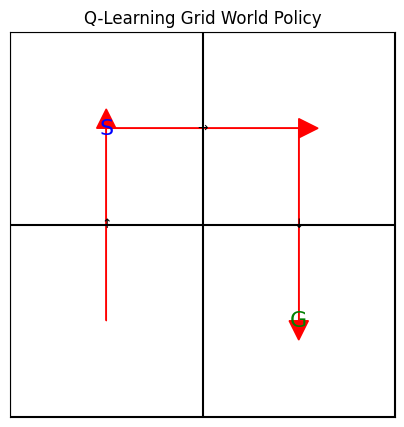

In [2]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Grid dimensions
grid_size = (2, 2)
fig, ax = plt.subplots(figsize=(5, 5))

# Draw grid
for x in range(grid_size[0] + 1):
    ax.plot([x, x], [0, grid_size[1]], color='black')
for y in range(grid_size[1] + 1):
    ax.plot([0, grid_size[0]], [y, y], color='black')

# State coordinates (x, y)
state_coords = {
    (0, 0): (0.5, 1.5),
    (0, 1): (1.5, 1.5),
    (1, 0): (0.5, 0.5),
    (1, 1): (1.5, 0.5)
}

# Mark start and goal
ax.text(0.5, 1.5, 'S', ha='center', va='center', fontsize=16, color='blue')
ax.text(1.5, 0.5, 'G', ha='center', va='center', fontsize=16, color='green')

# Arrows for learned policy
def draw_arrow(x, y, dx, dy, label):
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='red', ec='red')
    ax.text(x + dx / 2, y + dy / 2, label, fontsize=9, ha='center', va='center', color='black')

# Show best actions from Q-table
for (s, coords) in state_coords.items():
    if s == (1,1): continue  # Goal state
    best_action = max(q_table[s], key=q_table[s].get)
    if best_action == 'UP':
        draw_arrow(coords[0], coords[1], 0, 1, '↑')
    elif best_action == 'DOWN':
        draw_arrow(coords[0], coords[1], 0, -1, '↓')
    elif best_action == 'LEFT':
        draw_arrow(coords[0], coords[1], -1, 0, '←')
    elif best_action == 'RIGHT':
        draw_arrow(coords[0], coords[1], 1, 0, '→')

ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('Q-Learning Grid World Policy')
plt.show()


# 🧮 Step-by-Step Breakdown of Q-learning (4x4 GridWorld)

Let’s assume:
- $\alpha = 0.1$ (learning rate)
- $\gamma = 0.99$ (discount factor)
- $\epsilon = 0.0$ (for clarity in this breakdown; no random actions)

We’ll follow a sample trajectory and update the Q-values explicitly.

---

## 🎯 Goal: Reach (3, 3) while avoiding:
- 🟩 Goal state: (3,3), reward = +1
- ⛔ Obstacles: (1,1), (2,2), reward = -1
- ❌ Other steps: reward = -0.01 (step penalty)

---

## 🧾 Episode 1 (Initial State: (0,0))

Let’s say the agent moves:
**(0,0) → RIGHT → (0,1)**  
Reward $r = -0.01$  
Initial: $Q((0,0), RIGHT) = 0$

### Update Q((0,0), RIGHT):
$$
Q(s, a) \leftarrow Q(s, a) + \alpha \left[ r + \gamma \cdot \max_{a'} Q(s', a') - Q(s, a) \right]
$$

$$
Q((0,0), RIGHT) \leftarrow 0 + 0.1 \cdot \left[ -0.01 + 0.99 \cdot \max Q((0,1), \cdot) - 0 \right]
$$

Assume $\max Q((0,1), \cdot) = 0$ initially:

$$
Q((0,0), RIGHT) = -0.001
$$

---

## 🧾 Episode 2

Agent continues:  
**(0,1) → RIGHT → (0,2)**  
$r = -0.01$, again $\max Q((0,2), \cdot) = 0$

### Update Q((0,1), RIGHT):

$$
Q((0,1), RIGHT) = 0 + 0.1 \cdot (-0.01 + 0.99 \cdot 0 - 0) = -0.001
$$

---

## 🧾 Episode 3

**(0,2) → DOWN → (1,2)**  
$r = -0.01$

Then:  
**(1,2) → RIGHT → (1,3)**  
$r = -0.01$

Then:  
**(1,3) → DOWN → (2,3)**  
$r = -0.01$

Then:  
**(2,3) → DOWN → (3,3)** ✅ goal!  
$r = +1$

Now update in reverse:

---

### Update Q((2,3), DOWN):

$$
Q((2,3), DOWN) = 0 + 0.1 \cdot [1 + 0.99 \cdot 0 - 0] = 0.1
$$

---

### Update Q((1,3), DOWN):

Assume current $\max Q((2,3), \cdot) = 0.1

$$
Q((1,3), DOWN) = 0 + 0.1 \cdot [-0.01 + 0.99 \cdot 0.1 - 0] = 0.1 \cdot ( -0.01 + 0.099 ) = 0.0089
$$

---

### Update Q((1,2), RIGHT):

$$
Q((1,2), RIGHT) = 0 + 0.1 \cdot [ -0.01 + 0.99 \cdot 0.0089 ] = 0.1 \cdot ( -0.01 + 0.0088 ) = -0.00012
$$

---

### Update Q((0,2), DOWN):

$$
Q((0,2), DOWN) = 0 + 0.1 \cdot [ -0.01 + 0.99 \cdot (-0.00012) ] = -0.001012
$$

---

## 🔁 Summary Table (After Episode 3)

| State   | Action | Q-value      |
|---------|--------|--------------|
| (0,0)   | RIGHT  | -0.001       |
| (0,1)   | RIGHT  | -0.001       |
| (0,2)   | DOWN   | -0.001012    |
| (1,2)   | RIGHT  | -0.00012     |
| (1,3)   | DOWN   | +0.0089      |
| (2,3)   | DOWN   | +0.1         |

---

## ✅ Final Note

Each Q-value update pulls toward:
- **Immediate reward**
- **Expected future rewards** via $\max Q(s', a')$
- Controlled by $\alpha$ (how much to trust new experience)

Over many episodes, these values converge to represent the **true action values**, leading to an **optimal policy**.



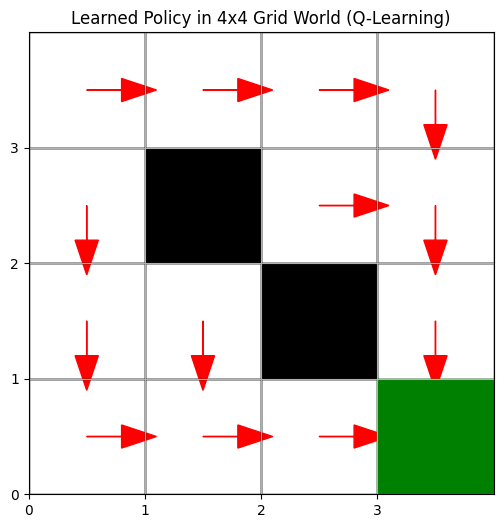

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# Define a 4x4 GridWorld with rewards, terminal states, and obstacles
grid_size = 4
actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
state_space = [(i, j) for i in range(grid_size) for j in range(grid_size)]

# Initialize Q-table
q_table_complex = {s: {a: 0.0 for a in actions} for s in state_space}

# Define rewards and environment
goal_state = (3, 3)
obstacles = [(1, 1), (2, 2)]
rewards = {s: -0.01 for s in state_space}
for obs in obstacles:
    rewards[obs] = -1
rewards[goal_state] = 1

# Parameters
alpha = 0.1
gamma = 0.99
epsilon = 0.2
episodes = 500

# Get next state given action
def step(state, action):
    if state in obstacles or state == goal_state:
        return state, 0, True

    i, j = state
    if action == 'UP': i = max(i - 1, 0)
    elif action == 'DOWN': i = min(i + 1, grid_size - 1)
    elif action == 'LEFT': j = max(j - 1, 0)
    elif action == 'RIGHT': j = min(j + 1, grid_size - 1)
    
    next_state = (i, j)
    reward = rewards[next_state]
    done = next_state == goal_state or next_state in obstacles
    return next_state, reward, done

# Training loop
for episode in range(episodes):
    state = (0, 0)
    done = False
    
    while not done:
        if random.random() < epsilon:
            action = random.choice(actions)
        else:
            action = max(q_table_complex[state], key=q_table_complex[state].get)
        
        next_state, reward, done = step(state, action)
        max_future_q = max(q_table_complex[next_state].values())
        current_q = q_table_complex[state][action]
        q_table_complex[state][action] = current_q + alpha * (reward + gamma * max_future_q - current_q)
        
        state = next_state

# Visualize the learned policy
def draw_policy(q_table, title):
    fig, ax = plt.subplots(figsize=(6, 6))
    for i in range(grid_size):
        for j in range(grid_size):
            s = (i, j)
            if s in obstacles:
                ax.add_patch(patches.Rectangle((j, grid_size - 1 - i), 1, 1, color='black'))
                continue
            if s == goal_state:
                ax.add_patch(patches.Rectangle((j, grid_size - 1 - i), 1, 1, color='green'))
                continue
            best_action = max(q_table[s], key=q_table[s].get)
            ax.add_patch(patches.Rectangle((j, grid_size - 1 - i), 1, 1, fill=False))
            if best_action == 'UP':
                ax.arrow(j+0.5, grid_size - 1 - i + 0.5, 0, 0.3, head_width=0.2, color='red')
            elif best_action == 'DOWN':
                ax.arrow(j+0.5, grid_size - 1 - i + 0.5, 0, -0.3, head_width=0.2, color='red')
            elif best_action == 'LEFT':
                ax.arrow(j+0.5, grid_size - 1 - i + 0.5, -0.3, 0, head_width=0.2, color='red')
            elif best_action == 'RIGHT':
                ax.arrow(j+0.5, grid_size - 1 - i + 0.5, 0.3, 0, head_width=0.2, color='red')

    ax.set_xticks(range(grid_size))
    ax.set_yticks(range(grid_size))
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_title(title)
    ax.grid(True)
    plt.show()

draw_policy(q_table_complex, 'Learned Policy in 4x4 Grid World (Q-Learning)')
